# Import Module & dataset

In [1]:
%pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install tensorflow
%pip install scikit-learn
%pip install arch
%pip install matplotlib
%pip install pandas
%pip install numpy
%pip install altair
%pip install statsmodels
%pip install scipy
%pip install yfinance
%pip install seaborn
%pip install keras-tuner

Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import random
import altair as alt
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Reshape, GRU, Dense, Dropout
from sklearn.model_selection import train_test_split
import seaborn as sns
from keras_tuner import Hyperband
from sklearn.model_selection import ParameterGrid

Read Dataset

In [5]:
buku_000 = pd.read_csv('D:\\KuliYeah\\Season 7\\Arc Skripsi\\forecasting\\buku_000.csv')
buku_100 = pd.read_csv('D:\\KuliYeah\\Season 7\\Arc Skripsi\\forecasting\\buku_100.csv')
buku_200 = pd.read_csv('D:\\KuliYeah\\Season 7\\Arc Skripsi\\forecasting\\buku_200.csv')
buku_300 = pd.read_csv('D:\\KuliYeah\\Season 7\\Arc Skripsi\\forecasting\\buku_300.csv')
buku_400 = pd.read_csv('D:\\KuliYeah\\Season 7\\Arc Skripsi\\forecasting\\buku_400.csv')
buku_500 = pd.read_csv('D:\\KuliYeah\\Season 7\\Arc Skripsi\\forecasting\\buku_500.csv')
buku_600 = pd.read_csv('D:\\KuliYeah\\Season 7\\Arc Skripsi\\forecasting\\buku_600.csv')
buku_700 = pd.read_csv('D:\\KuliYeah\\Season 7\\Arc Skripsi\\forecasting\\buku_700.csv')
buku_800 = pd.read_csv('D:\\KuliYeah\\Season 7\\Arc Skripsi\\forecasting\\buku_800.csv')
buku_900 = pd.read_csv('D:\\KuliYeah\\Season 7\\Arc Skripsi\\forecasting\\buku_900.csv')

buku_000['Bulan'] = pd.to_datetime(buku_000['Bulan'], format='%m/%y')
buku_100['Bulan'] = pd.to_datetime(buku_100['Bulan'], format='%m/%y')
buku_200['Bulan'] = pd.to_datetime(buku_200['Bulan'], format='%m/%y')
buku_300['Bulan'] = pd.to_datetime(buku_300['Bulan'], format='%m/%y')
buku_400['Bulan'] = pd.to_datetime(buku_400['Bulan'], format='%m/%y')
buku_500['Bulan'] = pd.to_datetime(buku_500['Bulan'], format='%m/%y')
buku_600['Bulan'] = pd.to_datetime(buku_600['Bulan'], format='%m/%y')
buku_700['Bulan'] = pd.to_datetime(buku_700['Bulan'], format='%m/%y')
buku_800['Bulan'] = pd.to_datetime(buku_800['Bulan'], format='%m/%y')
buku_900['Bulan'] = pd.to_datetime(buku_900['Bulan'], format='%m/%y')

# Peminjaman buku kategori general

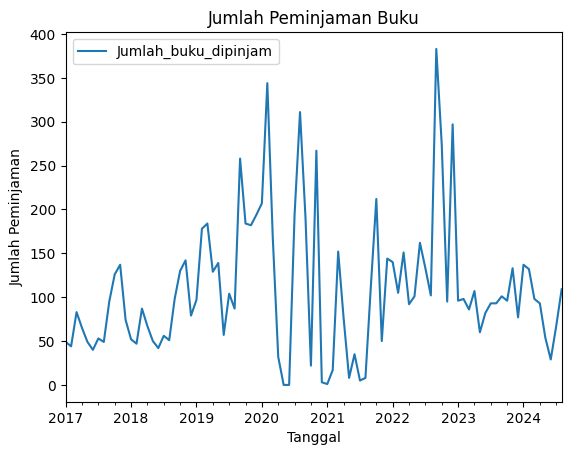

In [6]:
buku_000.plot(x='Bulan', y='Jumlah_buku_dipinjam', kind='line')
plt.title('Jumlah Peminjaman Buku')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Peminjaman')
plt.show()

Cek volatil

In [7]:
# Langkah 1: Periksa apakah ada nilai NaN di kolom 'Jumlah_buku_dipinjam'
print(f"Jumlah NaN di kolom 'Jumlah_buku_dipinjam': {buku_000['Jumlah_buku_dipinjam'].isna().sum()}")

# Jika ada NaN di kolom Jumlah_buku_dipinjam, hapus baris tersebut
buku_000_clean = buku_000.dropna(subset=['Jumlah_buku_dipinjam'])

# Langkah 2: Hitung perubahan persen antar periode
buku_000_clean['pct_change'] = buku_000_clean['Jumlah_buku_dipinjam'].pct_change()

# Langkah 3: Periksa apakah ada nilai inf atau -inf di kolom pct_change
print(f"Jumlah inf di kolom 'pct_change': {np.isinf(buku_000_clean['pct_change']).sum()}")

# Ganti nilai inf dengan NaN
buku_000_clean['pct_change'].replace([np.inf, -np.inf], np.nan, inplace=True)

# Hapus nilai NaN dari pct_change
df_clean = buku_000_clean['pct_change'].dropna()

# Langkah 4: Hitung standar deviasi dari perubahan persen
std_dev = np.std(df_clean)

# Langkah 5: Tampilkan standar deviasi
print(f'Standar deviasi dari perubahan persentase: {std_dev}')

# Langkah 6: Buat threshold untuk menentukan apakah data volatil atau tidak
threshold = 0.1  # Contoh threshold 10%
if std_dev > threshold:
    print("Data dianggap volatil")
else:
    print("Data tidak dianggap volatil")

Jumlah NaN di kolom 'Jumlah_buku_dipinjam': 0
Jumlah inf di kolom 'pct_change': 1
Standar deviasi dari perubahan persentase: 2.6592216299780524
Data dianggap volatil


C:\Users\asus\AppData\Local\Temp\ipykernel_19736\500041157.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  buku_000_clean['pct_change'].replace([np.inf, -np.inf], np.nan, inplace=True)


Outlier handling

In [8]:
# Menghitung Q1, Q3 dan IQR
Q1 = buku_000['Jumlah_buku_dipinjam'].quantile(0.25)
Q3 = buku_000['Jumlah_buku_dipinjam'].quantile(0.75)
IQR = Q3 - Q1

# Batas bawah dan atas untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
buku_000
outliers_000 = buku_000[(buku_000['Jumlah_buku_dipinjam'] < lower_bound) | (buku_000['Jumlah_buku_dipinjam'] > upper_bound)]

print(outliers_000)
# Menampilkan batas bawah dan atas
print(f"Batas bawah: {lower_bound}")
print(f"Batas atas: {upper_bound}")

        Bulan  Jumlah_buku_dipinjam
37 2020-02-01                   344
43 2020-08-01                   311
68 2022-09-01                   383
69 2022-10-01                   274
71 2022-12-01                   297
Batas bawah: -77.0
Batas atas: 269.0


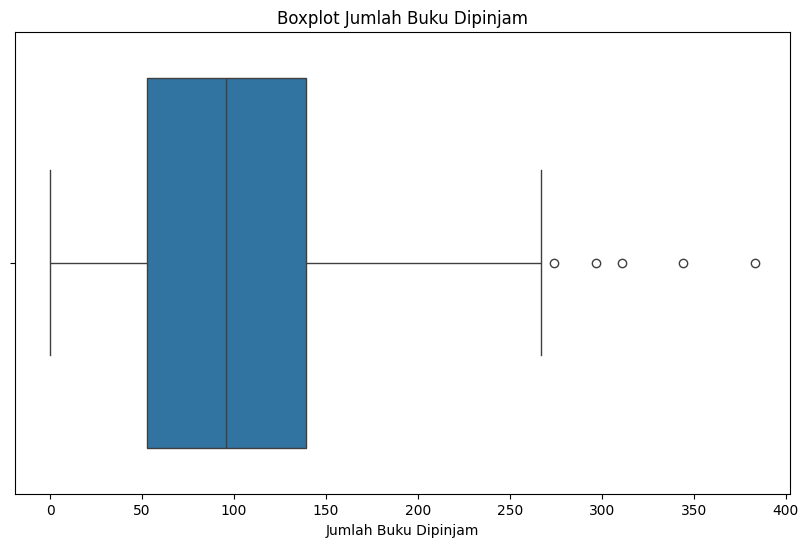

In [9]:
# Membuat boxplot untuk kolom 'Jumlah_buku_dipinjam'
plt.figure(figsize=(10, 6))
sns.boxplot(data=buku_000, x='Jumlah_buku_dipinjam')

# Menambahkan judul dan label
plt.title('Boxplot Jumlah Buku Dipinjam')
plt.xlabel('Jumlah Buku Dipinjam')

# Menampilkan boxplot
plt.show()


Rolling Window Median hyperparameter tuning

In [10]:
# Rentang hyperparameter
window_sizes = [8, 10, 12]  # Contoh rentang window size
tolerances = [0.5, 1, 1.5]  # Contoh rentang tolerance

# Simpan hasil tuning
results = []

for window_size in window_sizes:
    for tolerance in tolerances:
        # Rolling median dan rolling std
        buku_000['rolling_median'] = buku_000['Jumlah_buku_dipinjam'].rolling(window=window_size, center=True).median()
        buku_000['rolling_std'] = buku_000['Jumlah_buku_dipinjam'].rolling(window=window_size, center=True).std()

        # Batas atas dan bawah
        upper_bound = buku_000['rolling_median'] + tolerance * buku_000['rolling_std']
        lower_bound = buku_000['rolling_median'] - tolerance * buku_000['rolling_std']

        # Deteksi outlier
        detected_outliers = (buku_000['Jumlah_buku_dipinjam'] > upper_bound) | (buku_000['Jumlah_buku_dipinjam'] < lower_bound)
        num_outliers = detected_outliers.sum()

        # Simpan hasil
        results.append({
            'window_size': window_size,
            'tolerance': tolerance,
            'num_outliers': num_outliers
        })

# Mengonversi hasil menjadi DataFrame untuk analisis
import pandas as pd
results_df_000 = pd.DataFrame(results)

# Filter hasil untuk menampilkan hanya kombinasi dengan outlier
outlier_results = results_df_000.sort_values(by='num_outliers').iloc[0]

# Menampilkan hasil
if not outlier_results.empty:
    print("Kombinasi parameter dengan outlier terdeteksi:")
    print(outlier_results)
else:
    print("Tidak ada outlier yang terdeteksi untuk semua kombinasi parameter.")


Kombinasi parameter dengan outlier terdeteksi:
window_size      8.0
tolerance        1.5
num_outliers    11.0
Name: 2, dtype: float64


Outlier handling rolling window median

In [11]:
# Menghitung Moving Average atau Median
window_size = 8
# Menghitung Rolling Median
buku_000['rolling_median'] = buku_000['Jumlah_buku_dipinjam'].rolling(window=window_size, center=True).median()

# Menghitung batas toleransi outlier (misalnya 2 standar deviasi)
buku_000['rolling_std'] = buku_000['Jumlah_buku_dipinjam'].rolling(window=window_size, center=True).std()

# Batas atas dan bawah untuk deteksi outlier
tolerance = 1.5 # multiplier untuk standar deviasi
upper_bound = buku_000['rolling_median'] + tolerance * buku_000['rolling_std']
lower_bound = buku_000['rolling_median'] - tolerance * buku_000['rolling_std']

# Deteksi outlier
outliers = (buku_000['Jumlah_buku_dipinjam'] > upper_bound) | (buku_000['Jumlah_buku_dipinjam'] < lower_bound)

# Ganti outlier dengan rolling median
buku_000.loc[outliers, 'Jumlah_buku_dipinjam'] = buku_000.loc[outliers, 'rolling_median']

# Drop kolom rolling mean dan rolling std (opsional)
buku_000.drop(columns=['rolling_median', 'rolling_std'], inplace=True)

buku_000

C:\Users\asus\AppData\Local\Temp\ipykernel_19736\832479388.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ 63.5  63.5 183.  111.5  81.5 136.5 147.5 100.   93.   98.5  99.5]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  buku_000.loc[outliers, 'Jumlah_buku_dipinjam'] = buku_000.loc[outliers, 'rolling_median']


,Bulan,Jumlah_buku_dipinjam
0,2017-01-01,49.0
1,2017-02-01,44.0
2,2017-03-01,83.0
3,2017-04-01,65.0
4,2017-05-01,49.0
...,...,...
87,2024-04-01,93.0
88,2024-05-01,54.0
89,2024-06-01,29.0
90,2024-07-01,67.0


Plotting data setelah outlier handling

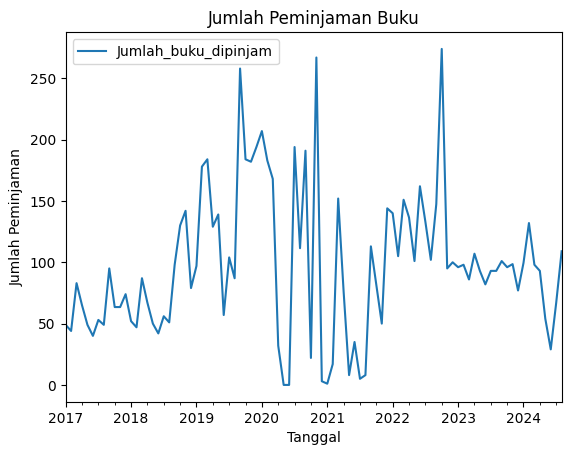

In [12]:
buku_000.plot(x='Bulan', y='Jumlah_buku_dipinjam', kind='line')
plt.title('Jumlah Peminjaman Buku')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Peminjaman')
plt.show()

Data split 70:30

Hyperparameter Tunning

In [16]:
# Data preprocessing
X = buku_000[['Jumlah_buku_dipinjam']].values
y = buku_000[['Jumlah_buku_dipinjam']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)
X_train = np.array(X_train).reshape((X_train.shape[0], 1, 1))
X_test = np.array(X_test).reshape((X_test.shape[0], 1, 1))

scaler = MinMaxScaler()
y_train_scaled = scaler.fit_transform(y_train)
y_test_scaled = scaler.transform(y_test)

# Parameter grid
param_grid = {
    'epochs': [50, 100],
    'batch_size': [16, 32],
    'activation': ['relu', 'tanh'],
    'filters': [32, 64],
    'units': [50, 100],
    'kernel_size': [1, 2, 3]
}

# Grid Search
best_rmse = float('inf')
best_params = None
results = []

# Iterate over parameter grid
for params in ParameterGrid(param_grid):
    print(f"Testing combination: {params}")
    
    # Build model
    model = Sequential()
    
    # CNN Layer
    model.add(Conv1D(filters=params['filters'], kernel_size=1, activation=params['activation'], input_shape=(1, 1)))
    model.add(MaxPooling1D(pool_size=1))
    model.add(Flatten())
    
    # Reshape for GRU
    model.add(Reshape((1, params['filters'])))
    
    # GRU Layer
    model.add(GRU(units=params['units'], activation=params['activation']))
    
    # Output Layer
    model.add(Dense(1))
    
    # Compile model
    model.compile(optimizer=Adam(), loss='mean_squared_error')
    
    # Train model
    history = model.fit(X_train, y_train_scaled, epochs=params['epochs'], batch_size=params['batch_size'], verbose=0)
    
    # Evaluate model
    y_pred = model.predict(X_test)
    y_pred_inverse = scaler.inverse_transform(y_pred)
    y_test_inverse = scaler.inverse_transform(y_test_scaled)
    mse = mean_squared_error(y_test_inverse, y_pred_inverse)
    rmse = np.sqrt(mse)
    print(f"RMSE: {rmse}")
    
    # Store results
    results.append((params, rmse))
    
    # Update best parameters
    if rmse < best_rmse:
        best_rmse = rmse
        best_params = params

# Print best parameters and RMSE
print(f"Best RMSE: {best_rmse}")
print(f"Best parameters: {best_params}")

# Display all results
for res in results:
    print(f"Params: {res[0]} -> RMSE: {res[1]}")

Testing combination: {'activation': 'relu', 'batch_size': 16, 'epochs': 50, 'filters': 32, 'kernel_size': 1, 'units': 50}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
RMSE: 1.690204158661094
Testing combination: {'activation': 'relu', 'batch_size': 16, 'epochs': 50, 'filters': 32, 'kernel_size': 1, 'units': 100}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
RMSE: 9.63652475499517
Testing combination: {'activation': 'relu', 'batch_size': 16, 'epochs': 50, 'filters': 32, 'kernel_size': 2, 'units': 50}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
RMSE: 3.6664649940031917
Testing combination: {'activation': 'relu', 'batch_size': 16, 'epochs': 50, 'filters': 32, 'kernel_size': 2, 'units': 100}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
RMSE: 0.4620468400252326
Testing combination: {'activation': 'relu', 'batch_size': 16, 'epochs': 50, 'filters': 32, 'kernel_size': 3, 'units': 50}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
RMSE: 1.4586354120709049
Testing combination: {'activation': 'relu', 'batch_size': 16, 'epochs': 50, 'filters': 32, 'kernel_size': 3, 'units': 100}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
RMSE: 0.7760385794139955
Testing combination: {'activation': 'relu', 'batch_size': 16, 'epochs': 50, 'filters': 64, 'kernel_size': 1, 'units': 50}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
RMSE: 1.1950483692633764
Testing combination: {'activation': 'relu', 'batch_size': 16, 'epochs': 50, 'filters': 64, 'kernel_size': 1, 'units': 100}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
RMSE: 0.7947045933557128
Testing combination: {'activation': 'relu', 'batch_size': 16, 'epochs': 50, 'filters': 64, 'kernel_size': 2, 'units': 50}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
RMSE: 2.1931144467370762
Testing combination: {'activation': 'relu', 'batch_size': 16, 'epochs': 50, 'filters': 64, 'kernel_size': 2, 'units': 100}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
RMSE: 1.7840901009869383
Testing combination: {'activation': 'relu', 'batch_size': 16, 'epochs': 50, 'filters': 64, 'kernel_size': 3, 'units': 50}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
RMSE: 1.1510243403593063
Testing combination: {'activation': 'relu', 'batch_size': 16, 'epochs': 50, 'filters': 64, 'kernel_size': 3, 'units': 100}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
RMSE: 2.037244905526877
Testing combination: {'activation': 'relu', 'batch_size': 16, 'epochs': 100, 'filters': 32, 'kernel_size': 1, 'units': 50}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
RMSE: 1.345974269417562
Testing combination: {'activation': 'relu', 'batch_size': 16, 'epochs': 100, 'filters': 32, 'kernel_size': 1, 'units': 100}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
RMSE: 0.4480290518217651
Testing combination: {'activation': 'relu', 'batch_size': 16, 'epochs': 100, 'filters': 32, 'kernel_size': 2, 'units': 50}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
RMSE: 1.3175810435929591
Testing combination: {'activation': 'relu', 'batch_size': 16, 'epochs': 100, 'filters': 32, 'kernel_size': 2, 'units': 100}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
RMSE: 1.7407730691163095
Testing combination: {'activation': 'relu', 'batch_size': 16, 'epochs': 100, 'filters': 32, 'kernel_size': 3, 'units': 50}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
RMSE: 5.451391965558739
Testing combination: {'activation': 'relu', 'batch_size': 16, 'epochs': 100, 'filters': 32, 'kernel_size': 3, 'units': 100}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
RMSE: 0.9095546002854613
Testing combination: {'activation': 'relu', 'batch_size': 16, 'epochs': 100, 'filters': 64, 'kernel_size': 1, 'units': 50}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
RMSE: 0.8148038644449008
Testing combination: {'activation': 'relu', 'batch_size': 16, 'epochs': 100, 'filters': 64, 'kernel_size': 1, 'units': 100}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
RMSE: 1.8409221793153925
Testing combination: {'activation': 'relu', 'batch_size': 16, 'epochs': 100, 'filters': 64, 'kernel_size': 2, 'units': 50}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
RMSE: 0.7146039091606177
Testing combination: {'activation': 'relu', 'batch_size': 16, 'epochs': 100, 'filters': 64, 'kernel_size': 2, 'units': 100}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
RMSE: 0.6723046227662023
Testing combination: {'activation': 'relu', 'batch_size': 16, 'epochs': 100, 'filters': 64, 'kernel_size': 3, 'units': 50}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
RMSE: 1.4071290618738836
Testing combination: {'activation': 'relu', 'batch_size': 16, 'epochs': 100, 'filters': 64, 'kernel_size': 3, 'units': 100}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
RMSE: 6.753157305031007
Testing combination: {'activation': 'relu', 'batch_size': 32, 'epochs': 50, 'filters': 32, 'kernel_size': 1, 'units': 50}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
RMSE: 5.538251522635823
Testing combination: {'activation': 'relu', 'batch_size': 32, 'epochs': 50, 'filters': 32, 'kernel_size': 1, 'units': 100}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
RMSE: 5.241922420109338
Testing combination: {'activation': 'relu', 'batch_size': 32, 'epochs': 50, 'filters': 32, 'kernel_size': 2, 'units': 50}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
RMSE: 1.5761979511755568
Testing combination: {'activation': 'relu', 'batch_size': 32, 'epochs': 50, 'filters': 32, 'kernel_size': 2, 'units': 100}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
RMSE: 13.801957396909259
Testing combination: {'activation': 'relu', 'batch_size': 32, 'epochs': 50, 'filters': 32, 'kernel_size': 3, 'units': 50}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
RMSE: 4.061867394535105
Testing combination: {'activation': 'relu', 'batch_size': 32, 'epochs': 50, 'filters': 32, 'kernel_size': 3, 'units': 100}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
RMSE: 4.929402662020447
Testing combination: {'activation': 'relu', 'batch_size': 32, 'epochs': 50, 'filters': 64, 'kernel_size': 1, 'units': 50}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
RMSE: 2.9396519301454833
Testing combination: {'activation': 'relu', 'batch_size': 32, 'epochs': 50, 'filters': 64, 'kernel_size': 1, 'units': 100}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
RMSE: 4.7289693078127115
Testing combination: {'activation': 'relu', 'batch_size': 32, 'epochs': 50, 'filters': 64, 'kernel_size': 2, 'units': 50}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
RMSE: 8.344275682171464
Testing combination: {'activation': 'relu', 'batch_size': 32, 'epochs': 50, 'filters': 64, 'kernel_size': 2, 'units': 100}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
RMSE: 2.962366917995218
Testing combination: {'activation': 'relu', 'batch_size': 32, 'epochs': 50, 'filters': 64, 'kernel_size': 3, 'units': 50}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
RMSE: 3.0760782446501667
Testing combination: {'activation': 'relu', 'batch_size': 32, 'epochs': 50, 'filters': 64, 'kernel_size': 3, 'units': 100}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
RMSE: 6.02110845374158
Testing combination: {'activation': 'relu', 'batch_size': 32, 'epochs': 100, 'filters': 32, 'kernel_size': 1, 'units': 50}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
RMSE: 4.278517491715595
Testing combination: {'activation': 'relu', 'batch_size': 32, 'epochs': 100, 'filters': 32, 'kernel_size': 1, 'units': 100}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
RMSE: 13.071693566133819
Testing combination: {'activation': 'relu', 'batch_size': 32, 'epochs': 100, 'filters': 32, 'kernel_size': 2, 'units': 50}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
RMSE: 2.114503724458626
Testing combination: {'activation': 'relu', 'batch_size': 32, 'epochs': 100, 'filters': 32, 'kernel_size': 2, 'units': 100}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
RMSE: 1.1271846037849234
Testing combination: {'activation': 'relu', 'batch_size': 32, 'epochs': 100, 'filters': 32, 'kernel_size': 3, 'units': 50}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
RMSE: 10.760178106514587
Testing combination: {'activation': 'relu', 'batch_size': 32, 'epochs': 100, 'filters': 32, 'kernel_size': 3, 'units': 100}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
RMSE: 1.3379734690357121
Testing combination: {'activation': 'relu', 'batch_size': 32, 'epochs': 100, 'filters': 64, 'kernel_size': 1, 'units': 50}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
RMSE: 2.8303503063111344
Testing combination: {'activation': 'relu', 'batch_size': 32, 'epochs': 100, 'filters': 64, 'kernel_size': 1, 'units': 100}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
RMSE: 9.216877164933422
Testing combination: {'activation': 'relu', 'batch_size': 32, 'epochs': 100, 'filters': 64, 'kernel_size': 2, 'units': 50}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
RMSE: 1.1212075909801598
Testing combination: {'activation': 'relu', 'batch_size': 32, 'epochs': 100, 'filters': 64, 'kernel_size': 2, 'units': 100}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
RMSE: 2.146629009465061
Testing combination: {'activation': 'relu', 'batch_size': 32, 'epochs': 100, 'filters': 64, 'kernel_size': 3, 'units': 50}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
RMSE: 5.221833348058459
Testing combination: {'activation': 'relu', 'batch_size': 32, 'epochs': 100, 'filters': 64, 'kernel_size': 3, 'units': 100}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
RMSE: 1.266480356570686
Testing combination: {'activation': 'tanh', 'batch_size': 16, 'epochs': 50, 'filters': 32, 'kernel_size': 1, 'units': 50}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
RMSE: 10.304448156976
Testing combination: {'activation': 'tanh', 'batch_size': 16, 'epochs': 50, 'filters': 32, 'kernel_size': 1, 'units': 100}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
RMSE: 6.92202843830531
Testing combination: {'activation': 'tanh', 'batch_size': 16, 'epochs': 50, 'filters': 32, 'kernel_size': 2, 'units': 50}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
RMSE: 8.299656612516662
Testing combination: {'activation': 'tanh', 'batch_size': 16, 'epochs': 50, 'filters': 32, 'kernel_size': 2, 'units': 100}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
RMSE: 9.607929776317317
Testing combination: {'activation': 'tanh', 'batch_size': 16, 'epochs': 50, 'filters': 32, 'kernel_size': 3, 'units': 50}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
RMSE: 13.536060941673194
Testing combination: {'activation': 'tanh', 'batch_size': 16, 'epochs': 50, 'filters': 32, 'kernel_size': 3, 'units': 100}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
RMSE: 10.511335862546966
Testing combination: {'activation': 'tanh', 'batch_size': 16, 'epochs': 50, 'filters': 64, 'kernel_size': 1, 'units': 50}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
RMSE: 9.826599952993293
Testing combination: {'activation': 'tanh', 'batch_size': 16, 'epochs': 50, 'filters': 64, 'kernel_size': 1, 'units': 100}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
RMSE: 10.364421783269831
Testing combination: {'activation': 'tanh', 'batch_size': 16, 'epochs': 50, 'filters': 64, 'kernel_size': 2, 'units': 50}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
RMSE: 7.217072953324874
Testing combination: {'activation': 'tanh', 'batch_size': 16, 'epochs': 50, 'filters': 64, 'kernel_size': 2, 'units': 100}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
RMSE: 6.555683203464982
Testing combination: {'activation': 'tanh', 'batch_size': 16, 'epochs': 50, 'filters': 64, 'kernel_size': 3, 'units': 50}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
RMSE: 6.728884005656229
Testing combination: {'activation': 'tanh', 'batch_size': 16, 'epochs': 50, 'filters': 64, 'kernel_size': 3, 'units': 100}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
RMSE: 6.551875056572619
Testing combination: {'activation': 'tanh', 'batch_size': 16, 'epochs': 100, 'filters': 32, 'kernel_size': 1, 'units': 50}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
RMSE: 5.957303806977459
Testing combination: {'activation': 'tanh', 'batch_size': 16, 'epochs': 100, 'filters': 32, 'kernel_size': 1, 'units': 100}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
RMSE: 10.008063491364435
Testing combination: {'activation': 'tanh', 'batch_size': 16, 'epochs': 100, 'filters': 32, 'kernel_size': 2, 'units': 50}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
RMSE: 5.026672395285329
Testing combination: {'activation': 'tanh', 'batch_size': 16, 'epochs': 100, 'filters': 32, 'kernel_size': 2, 'units': 100}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
RMSE: 4.032767322784594
Testing combination: {'activation': 'tanh', 'batch_size': 16, 'epochs': 100, 'filters': 32, 'kernel_size': 3, 'units': 50}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
RMSE: 13.704066910864913
Testing combination: {'activation': 'tanh', 'batch_size': 16, 'epochs': 100, 'filters': 32, 'kernel_size': 3, 'units': 100}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
RMSE: 5.0365393414275195
Testing combination: {'activation': 'tanh', 'batch_size': 16, 'epochs': 100, 'filters': 64, 'kernel_size': 1, 'units': 50}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
RMSE: 6.11315137320905
Testing combination: {'activation': 'tanh', 'batch_size': 16, 'epochs': 100, 'filters': 64, 'kernel_size': 1, 'units': 100}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
RMSE: 6.616788785990425
Testing combination: {'activation': 'tanh', 'batch_size': 16, 'epochs': 100, 'filters': 64, 'kernel_size': 2, 'units': 50}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
RMSE: 3.995800078646584
Testing combination: {'activation': 'tanh', 'batch_size': 16, 'epochs': 100, 'filters': 64, 'kernel_size': 2, 'units': 100}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
RMSE: 4.184833642489209
Testing combination: {'activation': 'tanh', 'batch_size': 16, 'epochs': 100, 'filters': 64, 'kernel_size': 3, 'units': 50}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
RMSE: 4.775830373500821
Testing combination: {'activation': 'tanh', 'batch_size': 16, 'epochs': 100, 'filters': 64, 'kernel_size': 3, 'units': 100}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
RMSE: 3.6618254409645616
Testing combination: {'activation': 'tanh', 'batch_size': 32, 'epochs': 50, 'filters': 32, 'kernel_size': 1, 'units': 50}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
RMSE: 16.699168158336082
Testing combination: {'activation': 'tanh', 'batch_size': 32, 'epochs': 50, 'filters': 32, 'kernel_size': 1, 'units': 100}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
RMSE: 8.099102233601627
Testing combination: {'activation': 'tanh', 'batch_size': 32, 'epochs': 50, 'filters': 32, 'kernel_size': 2, 'units': 50}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
RMSE: 9.749380174212252
Testing combination: {'activation': 'tanh', 'batch_size': 32, 'epochs': 50, 'filters': 32, 'kernel_size': 2, 'units': 100}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
RMSE: 7.313023073248617
Testing combination: {'activation': 'tanh', 'batch_size': 32, 'epochs': 50, 'filters': 32, 'kernel_size': 3, 'units': 50}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
RMSE: 15.06918033002011
Testing combination: {'activation': 'tanh', 'batch_size': 32, 'epochs': 50, 'filters': 32, 'kernel_size': 3, 'units': 100}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
RMSE: 8.630717916770529
Testing combination: {'activation': 'tanh', 'batch_size': 32, 'epochs': 50, 'filters': 64, 'kernel_size': 1, 'units': 50}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
RMSE: 8.83924576762991
Testing combination: {'activation': 'tanh', 'batch_size': 32, 'epochs': 50, 'filters': 64, 'kernel_size': 1, 'units': 100}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
RMSE: 8.10611329216457
Testing combination: {'activation': 'tanh', 'batch_size': 32, 'epochs': 50, 'filters': 64, 'kernel_size': 2, 'units': 50}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
RMSE: 7.418308041359017
Testing combination: {'activation': 'tanh', 'batch_size': 32, 'epochs': 50, 'filters': 64, 'kernel_size': 2, 'units': 100}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
RMSE: 8.71574428793879
Testing combination: {'activation': 'tanh', 'batch_size': 32, 'epochs': 50, 'filters': 64, 'kernel_size': 3, 'units': 50}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
RMSE: 11.596720579141195
Testing combination: {'activation': 'tanh', 'batch_size': 32, 'epochs': 50, 'filters': 64, 'kernel_size': 3, 'units': 100}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
RMSE: 7.461188738763545
Testing combination: {'activation': 'tanh', 'batch_size': 32, 'epochs': 100, 'filters': 32, 'kernel_size': 1, 'units': 50}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
RMSE: 6.4972809076663625
Testing combination: {'activation': 'tanh', 'batch_size': 32, 'epochs': 100, 'filters': 32, 'kernel_size': 1, 'units': 100}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
RMSE: 5.513737661220289
Testing combination: {'activation': 'tanh', 'batch_size': 32, 'epochs': 100, 'filters': 32, 'kernel_size': 2, 'units': 50}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
RMSE: 6.949020909950066
Testing combination: {'activation': 'tanh', 'batch_size': 32, 'epochs': 100, 'filters': 32, 'kernel_size': 2, 'units': 100}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
RMSE: 7.265948790672928
Testing combination: {'activation': 'tanh', 'batch_size': 32, 'epochs': 100, 'filters': 32, 'kernel_size': 3, 'units': 50}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
RMSE: 10.208315896562688
Testing combination: {'activation': 'tanh', 'batch_size': 32, 'epochs': 100, 'filters': 32, 'kernel_size': 3, 'units': 100}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
RMSE: 8.439896193796802
Testing combination: {'activation': 'tanh', 'batch_size': 32, 'epochs': 100, 'filters': 64, 'kernel_size': 1, 'units': 50}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
RMSE: 4.682399626208828
Testing combination: {'activation': 'tanh', 'batch_size': 32, 'epochs': 100, 'filters': 64, 'kernel_size': 1, 'units': 100}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
RMSE: 5.595340693872313
Testing combination: {'activation': 'tanh', 'batch_size': 32, 'epochs': 100, 'filters': 64, 'kernel_size': 2, 'units': 50}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
RMSE: 6.7565879860427795
Testing combination: {'activation': 'tanh', 'batch_size': 32, 'epochs': 100, 'filters': 64, 'kernel_size': 2, 'units': 100}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
RMSE: 5.5703588981364405
Testing combination: {'activation': 'tanh', 'batch_size': 32, 'epochs': 100, 'filters': 64, 'kernel_size': 3, 'units': 50}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
RMSE: 4.749559048894353
Testing combination: {'activation': 'tanh', 'batch_size': 32, 'epochs': 100, 'filters': 64, 'kernel_size': 3, 'units': 100}


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
RMSE: 4.428559961543868
Best RMSE: 0.4480290518217651
Best parameters: {'activation': 'relu', 'batch_size': 16, 'epochs': 100, 'filters': 32, 'kernel_size': 1, 'units': 100}
Params: {'activation': 'relu', 'batch_size': 16, 'epochs': 50, 'filters': 32, 'kernel_size': 1, 'units': 50} -> RMSE: 1.690204158661094
Params: {'activation': 'relu', 'batch_size': 16, 'epochs': 50, 'filters': 32, 'kernel_size': 1, 'units': 100} -> RMSE: 9.63652475499517
Params: {'activation': 'relu', 'batch_size': 16, 'epochs': 50, 'filters': 32, 'kernel_size': 2, 'units': 50} -> RMSE: 3.6664649940031917
Params: {'activation': 'relu', 'batch_size': 16, 'epochs': 50, 'filters': 32, 'kernel_size': 2, 'units': 100} -> RMSE: 0.4620468400252326
Params: {'activation': 'relu', 'batch_size': 16, 'epochs': 50, 'filters': 32, 'kernel_size': 3, 'units': 50} -> RMSE: 1.4586354120709049
Params: {'activation': 'relu', 'batch_size': 16, 'epochs': 50, 'filters': 32, 'kernel_size': 3, 'units'

Model CNN-GRU

Epoch 1/100


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 2.5200 
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.0292 
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2455
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4275 
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1963 
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1616
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3619
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1563
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0956
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1241
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0180     
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0431
Epoch 13/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0272 
Epoch 14/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0035    
Epoch 15/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0046
Epoch 16/100
4/4 ━━━━━━━━━━━━━━

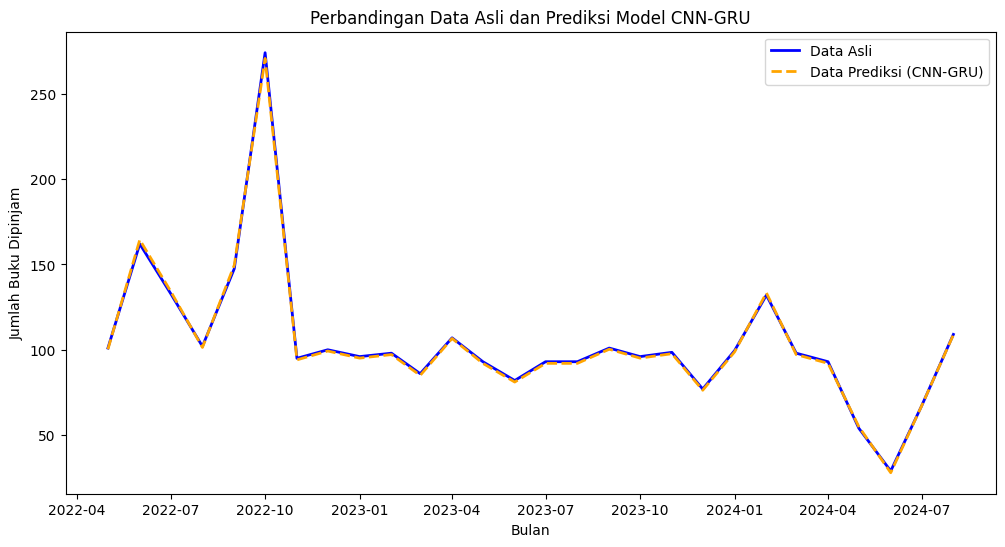

In [18]:
# Memisahkan fitur dan target
X = buku_000[['Jumlah_buku_dipinjam']]  # Changed here
y = buku_000[['Jumlah_buku_dipinjam']]  # Changed here

# Split data menjadi data latih dan data uji (70% latih, 30% uji)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

# Reshape input menjadi tiga dimensi
# Menggunakan 1 timestep (karena kita menggunakan data dari saat ini saja)
X_train = np.array(X_train).reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = np.array(X_test).reshape((X_test.shape[0], 1, X_test.shape[1]))

# Normalisasi data (opsional jika diperlukan oleh model RNN)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1))

# Tentukan input shape
input_shape = (X_train.shape[1], X_train.shape[2])

# Model CNN-GRU
model_cnn_gru = Sequential()

# Lapisan CNN untuk ekstraksi fitur
model_cnn_gru.add(Conv1D(filters=32, kernel_size=1, activation='relu', input_shape=input_shape))
model_cnn_gru.add(MaxPooling1D(pool_size=1))
model_cnn_gru.add(Flatten())

# Ubah kembali ke bentuk tiga dimensi untuk input ke GRU
model_cnn_gru.add(Reshape((1, -1)))

# Lapisan GRU setelah CNN
model_cnn_gru.add(GRU(100, activation='relu'))

# Lapisan output
model_cnn_gru.add(Dense(1))

# Kompilasi model
model_cnn_gru.compile(optimizer='adam', loss='mean_squared_error')

# Latih model
model_cnn_gru.fit(X_train, y_train_scaled, epochs=100, batch_size=16)

# Prediksi pada data uji
y_pred_cnn_gru = model_cnn_gru.predict(X_test)

y_pred_cnn_gru_inverse = scaler.inverse_transform(y_pred_cnn_gru)
y_test_scaled_inverse = scaler.inverse_transform(y_test_scaled)

# Evaluasi model
mse = mean_squared_error(y_test_scaled_inverse, y_pred_cnn_gru_inverse)
rmse = np.sqrt(mse)

print(f"RMSE: {rmse}")

# Visualisasi hasil prediksi dari model CNN-GRU
bulan = buku_000.iloc[-len(y_test):]['Bulan'].values  # Ambil data bulan dari data uji
plt.figure(figsize=(12, 6))
plt.plot(bulan, y_test_scaled_inverse, label='Data Asli', color='blue', linewidth=2)
plt.plot(bulan, y_pred_cnn_gru_inverse, label='Data Prediksi (CNN-GRU)', color='orange', linestyle='--', linewidth=2)
plt.xlabel('Bulan')
plt.ylabel('Jumlah Buku Dipinjam')
plt.title('Perbandingan Data Asli dan Prediksi Model CNN-GRU')
plt.legend()
plt.show()

Data split 80:20

In [ ]:
# Memisahkan fitur dan target
X = buku_000[['Jumlah_buku_dipinjam']]  # Changed here
y = buku_000[['Jumlah_buku_dipinjam']]  # Changed here

# Split data menjadi data latih dan data uji (80% latih, 20% uji)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Reshape input menjadi tiga dimensi
# Menggunakan 1 timestep (karena kita menggunakan data dari saat ini saja)
X_train = np.array(X_train).reshape((X_train.shape[0], 1, X_train.shape[1]))  # timesteps=1
X_test = np.array(X_test).reshape((X_test.shape[0], 1, X_test.shape[1]))  # timesteps=1


# Normalisasi data (opsional jika diperlukan oleh model RNN)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1))

# Tentukan input shape
input_shape = (X_train.shape[1], X_train.shape[2])

# Model CNN-GRU
model_cnn_gru = Sequential()

# Lapisan CNN untuk ekstraksi fitur
model_cnn_gru.add(Conv1D(filters=128, kernel_size=1, activation='relu', input_shape=input_shape))
model_cnn_gru.add(MaxPooling1D(pool_size=1))
model_cnn_gru.add(Flatten())

# Ubah kembali ke bentuk tiga dimensi untuk input ke GRU
model_cnn_gru.add(Reshape((1, -1)))

# Lapisan GRU setelah CNN
model_cnn_gru.add(GRU(100, activation='relu'))

# Lapisan output
model_cnn_gru.add(Dense(1))

# Kompilasi model
model_cnn_gru.compile(optimizer='adam', loss='mean_squared_error')

# Latih model
model_cnn_gru.fit(X_train, y_train_scaled, epochs=170, batch_size=32)

# Prediksi pada data uji
y_pred_cnn_gru = model_cnn_gru.predict(X_test)

y_pred_cnn_gru_inverse = scaler.inverse_transform(y_pred_cnn_gru)
y_test_scaled_inverse = scaler.inverse_transform(y_test_scaled)

# Evaluasi model
mse = mean_squared_error(y_test_scaled_inverse, y_pred_cnn_gru_inverse)
rmse = np.sqrt(mse)

print(f"RMSE: {rmse}")

# Visualisasi hasil prediksi dari model CNN-GRU
bulan = buku_000.iloc[-len(y_test):]['Bulan'].values  # Ambil data bulan dari data uji
plt.figure(figsize=(12, 6))
plt.plot(bulan, y_test_scaled_inverse, label='Data Asli', color='blue', linewidth=2)
plt.plot(bulan, y_pred_cnn_gru_inverse, label='Data Prediksi (CNN-GRU)', color='orange', linestyle='--', linewidth=2)
plt.xlabel('Waktu')
plt.ylabel('Jumlah Buku Dipinjam')
plt.title('Perbandingan Data Asli dan Prediksi Model CNN-GRU')
plt.legend()
plt.show()

Data split 90:10

In [ ]:
# Memisahkan fitur dan target
X = buku_000[['Jumlah_buku_dipinjam']]  # Changed here
y = buku_000[['Jumlah_buku_dipinjam']]  # Changed here

# Split data menjadi data latih dan data uji (90% latih, 10% uji)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

# Reshape input menjadi tiga dimensi
# Menggunakan 1 timestep (karena kita menggunakan data dari saat ini saja)
X_train = np.array(X_train).reshape((X_train.shape[0], 1, X_train.shape[1]))  # timesteps=1
X_test = np.array(X_test).reshape((X_test.shape[0], 1, X_test.shape[1]))  # timesteps=1


# Normalisasi data (opsional jika diperlukan oleh model RNN)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1))

# Tentukan input shape
input_shape = (X_train.shape[1], X_train.shape[2])

# Model CNN-GRU
model_cnn_gru = Sequential()

# Lapisan CNN untuk ekstraksi fitur
model_cnn_gru.add(Conv1D(filters=128, kernel_size=1, activation='relu', input_shape=input_shape))
model_cnn_gru.add(MaxPooling1D(pool_size=1))
model_cnn_gru.add(Flatten())

# Ubah kembali ke bentuk tiga dimensi untuk input ke GRU
model_cnn_gru.add(Reshape((1, -1)))

# Lapisan GRU setelah CNN
model_cnn_gru.add(GRU(100, activation='relu'))

# Lapisan output
model_cnn_gru.add(Dense(1))

# Kompilasi model
model_cnn_gru.compile(optimizer='adam', loss='mean_squared_error')

# Latih model
model_cnn_gru.fit(X_train, y_train_scaled, epochs=170, batch_size=32)

# Prediksi pada data uji
y_pred_cnn_gru = model_cnn_gru.predict(X_test)

y_pred_cnn_gru_inverse = scaler.inverse_transform(y_pred_cnn_gru)
y_test_scaled_inverse = scaler.inverse_transform(y_test_scaled)

# Evaluasi model
mse = mean_squared_error(y_test_scaled_inverse, y_pred_cnn_gru_inverse)
rmse = np.sqrt(mse)

print(f"RMSE: {rmse}")

# Visualisasi hasil prediksi dari model CNN-GRU
bulan = buku_000.iloc[-len(y_test):]['Bulan'].values  # Ambil data bulan dari data uji
plt.figure(figsize=(12, 6))
plt.plot(bulan, y_test_scaled_inverse, label='Data Asli', color='blue', linewidth=2)
plt.plot(bulan, y_pred_cnn_gru_inverse, label='Data Prediksi (CNN-GRU)', color='orange', linestyle='--', linewidth=2)
plt.xlabel('Waktu')
plt.ylabel('Jumlah Buku Dipinjam')
plt.title('Perbandingan Data Asli dan Prediksi Model CNN-GRU')
plt.legend()
plt.show()

Forecasting 12 bulan kedepan

In [ ]:
# Tentukan jumlah minggu yang ingin digunakan sebagai input
timesteps = 50  # Menggunakan 12 minggu terakhir sebagai konteks

# Fungsi untuk membuat data dengan sliding window
def create_sliding_window_data(data, timesteps):
    X, y = [], []
    for i in range(len(data) - timesteps):
        X.append(data[i:i + timesteps])
        y.append(data[i + timesteps])
    return np.array(X), np.array(y)

# Scaling data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(buku_000['Jumlah_buku_dipinjam'].values.reshape(-1, 1))

# Membuat data latih dengan sliding window
X, y = create_sliding_window_data(data_scaled, timesteps)
X_train, X_test = X[:-1], X[-1:]  # Menggunakan data terakhir di X_test untuk memulai prediksi
y_train = y[:-1]  # Tidak membutuhkan y_test di sini

# Model CNN-GRU
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(MaxPooling1D(pool_size=1))
model.add(GRU(50, activation='relu'))
model.add(Dense(1))

# Kompilasi model
model.compile(optimizer='adam', loss='mean_squared_error')

# Latih model
model.fit(X_train, y_train, epochs=170, batch_size=32, verbose=1)

# Hybrid Prediction: Prediksi Minggu Pertama + Iterasi untuk Prediksi 11 Minggu Berikutnya
predictions = []

# Prediksi minggu pertama
pred_first = model.predict(X_test)
predictions.append(pred_first[0, 0])

# Iterasi untuk prediksi minggu berikutnya
last_data = np.concatenate([X_test[:, 1:, :], np.array(pred_first).reshape((1, 1, 1))], axis=1)

for i in range(11):  # Melanjutkan untuk 11 minggu berikutnya
    pred = model.predict(last_data)
    predictions.append(pred[0, 0])

    # Update last_data dengan prediksi baru
    new_input = np.array(pred).reshape((1, 1, 1))
    last_data = np.concatenate([last_data[:, 1:, :], new_input], axis=1)

# Denormalisasi hasil prediksi ke skala asli
predictions_original = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Adjust future dates to start immediately after the last known date in the dataset
last_date = buku_000['Bulan'].iloc[-1]
future_dates = pd.date_range(last_date, periods=12, freq='M')

# Adjust future dates to start immediately after the last known date in the dataset
last_date = buku_000['Bulan'].iloc[-1]
future_dates = pd.date_range(last_date + pd.DateOffset(months=1), periods=12, freq='M')

# Ensure predictions have only 12 values
predictions_original = predictions_original[:12]

# Combine actual data with forecast for a continuous line
combined_data = np.concatenate([scaler.inverse_transform(data_scaled).flatten(), predictions_original.flatten()])
combined_dates = pd.date_range(buku_000['Bulan'].iloc[0], periods=len(combined_data), freq='M')

# Plot the combined actual and forecasted values
plt.figure(figsize=(12, 6))
plt.plot(combined_dates, combined_data, label='Actual + Forecast', color='orange')
plt.axvline(last_date, color='gray', linestyle='--', label='Forecast Start')
plt.title('Forecast of Peminjaman Buku for Next 12 Months Using CNN-GRU (Hybrid)')
plt.xlabel('Tanggal')
plt.ylabel('Peminjaman Buku')
plt.legend()
plt.xticks(rotation=45)
plt.show()


# Peminjaman buku kategori filosofi dan psikologi

In [ ]:
buku_100.plot(x='Bulan', y='Jumlah_buku_dipinjam', kind='line')
plt.title('Jumlah Peminjaman Buku')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Peminjaman')
plt.show()

Cek volatil

In [ ]:
import pandas as pd
import numpy as np

# Misal buku_100 adalah DataFrame yang berisi data Anda

# Langkah 1: Periksa apakah ada nilai NaN di kolom 'Jumlah_buku_dipinjam'
print(f"Jumlah NaN di kolom 'Jumlah_buku_dipinjam': {buku_100['Jumlah_buku_dipinjam'].isna().sum()}")

# Jika ada NaN di kolom Jumlah_buku_dipinjam, hapus baris tersebut
buku_100_clean = buku_100.dropna(subset=['Jumlah_buku_dipinjam'])

# Langkah 2: Hitung perubahan persen antar periode
buku_100_clean['pct_change'] = buku_100_clean['Jumlah_buku_dipinjam'].pct_change()

# Langkah 3: Periksa apakah ada nilai inf atau -inf di kolom pct_change
print(f"Jumlah inf di kolom 'pct_change': {np.isinf(buku_100_clean['pct_change']).sum()}")

# Ganti nilai inf dengan NaN
buku_100_clean['pct_change'].replace([np.inf, -np.inf], np.nan, inplace=True)

# Hapus nilai NaN dari pct_change
df_clean = buku_100_clean['pct_change'].dropna()

# Langkah 4: Hitung standar deviasi dari perubahan persen
std_dev = np.std(df_clean)

# Langkah 5: Tampilkan standar deviasi
print(f'Standar deviasi dari perubahan persentase: {std_dev}')

# Langkah 6: Buat threshold untuk menentukan apakah data volatil atau tidak
threshold = 0.1  # Contoh threshold 10%
if std_dev > threshold:
    print("Data dianggap volatil")
else:
    print("Data tidak dianggap volatil")

Outlier handling

In [ ]:
# Menghitung Q1, Q3 dan IQR
Q1 = buku_100['Jumlah_buku_dipinjam'].quantile(0.25)
Q3 = buku_100['Jumlah_buku_dipinjam'].quantile(0.75)
IQR = Q3 - Q1

# Batas bawah dan atas untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
buku_100
outliers_000 = buku_100[(buku_100['Jumlah_buku_dipinjam'] < lower_bound) | (buku_100['Jumlah_buku_dipinjam'] > upper_bound)]

print(outliers_000)
# Menampilkan batas bawah dan atas
print(f"Batas bawah: {lower_bound}")
print(f"Batas atas: {upper_bound}")

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(buku_100['Jumlah_buku_dipinjam'], model='additive', period=12)
result.plot()
plt.show()

In [ ]:
# Menambahkan beberapa outlier secara manual untuk contoh
buku_100.loc[26, 'Jumlah_buku_dipinjam'] = 245
buku_100.loc[27, 'Jumlah_buku_dipinjam'] = 221
buku_100.loc[28, 'Jumlah_buku_dipinjam'] = 192
buku_100.loc[32, 'Jumlah_buku_dipinjam'] = 204
buku_100.loc[37, 'Jumlah_buku_dipinjam'] = 341

# Menghitung Moving Average atau Median (misalnya window 3 bulan)
window_size = 6
# Menghitung Rolling Median
buku_100['rolling_median'] = buku_100['Jumlah_buku_dipinjam'].rolling(window=window_size, center=True).median()

# Menghitung batas toleransi outlier (misalnya 2 standar deviasi)
buku_100['rolling_std'] = buku_100['Jumlah_buku_dipinjam'].rolling(window=window_size, center=True).std()

# Batas atas dan bawah untuk deteksi outlier
tolerance =  1.5  # multiplier untuk standar deviasi
upper_bound = buku_100['rolling_median'] + tolerance * buku_100['rolling_std']
lower_bound = buku_100['rolling_median'] - tolerance * buku_100['rolling_std']

# Deteksi outlier
outliers = (buku_100['Jumlah_buku_dipinjam'] > upper_bound) | (buku_100['Jumlah_buku_dipinjam'] < lower_bound)

# Ganti outlier dengan rolling median
buku_100.loc[outliers, 'Jumlah_buku_dipinjam'] = buku_100.loc[outliers, 'rolling_median']

# Drop kolom rolling mean dan rolling std (opsional)
buku_100.drop(columns=['rolling_median', 'rolling_std'], inplace=True)
buku_100

In [ ]:
buku_100.plot(x='Bulan', y='Jumlah_buku_dipinjam', kind='line')
plt.title('Jumlah Peminjaman Buku')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Peminjaman')
plt.show()

CNN-GRU

In [ ]:
# Assume peminjaman_buku is your DataFrame
data = buku_100['Jumlah_buku_dipinjam'].values.reshape(-1, 1)

# Scale the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Create sequences
def create_sequences(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Set time step
time_step = 12  # Example: use the past 12 months to predict the next month
X, y = create_sequences(data_scaled, time_step)

# Split into training and testing sets (e.g., 90% train, 10% test)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape input for CNN and GRU (required format: [samples, time steps, features])
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build the hybrid CNN-GRU model
model = Sequential()

# Add CNN layers
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

# Add GRU layers
model.add(GRU(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(GRU(50))

# Add Dense layer to output predictions
model.add(Dense(1))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Make predictions
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

# Inverse scaling to get actual values
train_pred = scaler.inverse_transform(train_pred)
test_pred = scaler.inverse_transform(test_pred)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluate the model
mae = mean_absolute_error(y_test_actual, test_pred)
mse = mean_squared_error(y_test_actual, test_pred)
rmse = np.sqrt(mse)

# Print metrics
print(f'MAE: {mae}, MSE: {mse}, RMSE: {rmse}')

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test_actual)), y_test_actual, label='Actual  Test Data')
plt.plot(range(len(y_test_actual)), test_pred, label='Predicted Test Data', linestyle='--')
# plt.plot(range(time_step, len(train_pred) + time_step), train_pred, label='Train Predictions')
# plt.plot(test.index, test.iloc[:,0], label='Actual Test')
# plt.plot(range(len(train_pred) + time_step, len(data) - 1), test_pred, label='Predictions', linestyle='--')
plt.title('Hybrid CNN-GRU Forecasting')
plt.xlabel('Time')
plt.ylabel('Jumlah Peminjaman')
plt.legend()
plt.show()

In [ ]:
# 4. Predict the next 3 months

# We need the last 'time_step' data points from the training data to predict the future
last_sequence = data_scaled[-time_step:]  # Take the last sequence from the data

# Reshape for CNN-GRU model input
last_sequence = last_sequence.reshape((1, time_step, 1))

# Predict the next 3 months iteratively
predictions = []

for i in range(12):  # Forecast for 3 months ahead
    next_pred = model.predict(last_sequence)
    predictions.append(next_pred[0][0])

    # Update the sequence: drop the first value and append the prediction
    # Reshape next_pred to match dimensions of last_sequence[:, 1:, :]
    next_pred_reshaped = next_pred.reshape(1, 1, 1)
    last_sequence = np.concatenate([last_sequence[:, 1:, :], next_pred_reshaped], axis=1)

# Inverse transform predictions
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# 5. Plot the results

# Plot the actual data and forecast
plt.figure(figsize=(10, 6))
plt.plot(range(len(data)), data, label='Actual Data')
plt.plot(range(len(data), len(data) + 12), predictions, label='3-Month Forecast', linestyle='--', color='red')
plt.title('Book Borrowing Forecast - Next 3 Months')
plt.xlabel('Time (Months)')
plt.ylabel('Jumlah Peminjaman')
plt.legend()
plt.show()

# 6. Print the forecasted values
print(f"Forecast for the next 3 months: {predictions.flatten()}")

# Peminjaman buku kategori reiligi

In [ ]:
buku_200.plot(x='Bulan', y='Jumlah_buku_dipinjam', kind='line')
plt.title('Jumlah Peminjaman Buku')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Peminjaman')
plt.show()

Cek volatil

In [ ]:
import pandas as pd
import numpy as np

# Misal buku_000 adalah DataFrame yang berisi data Anda

# Langkah 1: Periksa apakah ada nilai NaN di kolom 'Jumlah_buku_dipinjam'
print(f"Jumlah NaN di kolom 'Jumlah_buku_dipinjam': {buku_200['Jumlah_buku_dipinjam'].isna().sum()}")

# Jika ada NaN di kolom Jumlah_buku_dipinjam, hapus baris tersebut
buku_200_clean = buku_200.dropna(subset=['Jumlah_buku_dipinjam'])

# Langkah 2: Hitung perubahan persen antar periode
buku_200_clean['pct_change'] = buku_200_clean['Jumlah_buku_dipinjam'].pct_change()

# Langkah 3: Periksa apakah ada nilai inf atau -inf di kolom pct_change
print(f"Jumlah inf di kolom 'pct_change': {np.isinf(buku_200_clean['pct_change']).sum()}")

# Ganti nilai inf dengan NaN
buku_200_clean['pct_change'].replace([np.inf, -np.inf], np.nan, inplace=True)

# Hapus nilai NaN dari pct_change
df_clean = buku_200_clean['pct_change'].dropna()

# Langkah 4: Hitung standar deviasi dari perubahan persen
std_dev = np.std(df_clean)

# Langkah 5: Tampilkan standar deviasi
print(f'Standar deviasi dari perubahan persentase: {std_dev}')

# Langkah 6: Buat threshold untuk menentukan apakah data volatil atau tidak
threshold = 0.1  # Contoh threshold 10%
if std_dev > threshold:
    print("Data dianggap volatil")
else:
    print("Data tidak dianggap volatil")

Outlier handling

In [ ]:
# Menghitung Q1, Q3 dan IQR
Q1 = buku_200['Jumlah_buku_dipinjam'].quantile(0.25)
Q3 = buku_200['Jumlah_buku_dipinjam'].quantile(0.75)
IQR = Q3 - Q1

# Batas bawah dan atas untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
buku_200
outliers_000 = buku_200[(buku_200['Jumlah_buku_dipinjam'] < lower_bound) | (buku_200['Jumlah_buku_dipinjam'] > upper_bound)]

print(outliers_000)
# Menampilkan batas bawah dan atas
print(f"Batas bawah: {lower_bound}")
print(f"Batas atas: {upper_bound}")

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(buku_200['Jumlah_buku_dipinjam'], model='additive', period=12)
result.plot()
plt.show()

In [ ]:
# # Fungsi untuk menghitung Modified Z-Score
# def modified_z_score(series):
#     median = np.median(series)
#     mad = np.median(np.abs(series - median))  # Median Absolute Deviation (MAD)
#     modified_z = 0.6745 * (series - median) / mad  # Modified Z-Score formula
#     return modified_z

# # Menghitung Modified Z-Score untuk data 'Jumlah_buku_dipinjam'
# buku_200['modified_z'] = modified_z_score(buku_200['Jumlah_buku_dipinjam'])

# # Ambang batas untuk outlier (umumnya 3.5)
# threshold = 3.5

# # Identifikasi outlier
# outliers = buku_200[(buku_200['modified_z'] > threshold) | (buku_200['modified_z'] < -threshold)]
# print("Outlier detected:")
# print(outliers)

# # Ganti outlier dengan median atau nilai lain yang masuk akal
# median_value = np.median(buku_200['Jumlah_buku_dipinjam'])

# # Mengganti nilai outlier dengan median
# buku_200.loc[(buku_200['modified_z'] > threshold) | (buku_200['modified_z'] < -threshold), 'Jumlah_buku_dipinjam'] = median_value

# # Hapus kolom 'modified_z' setelah penggantian outlier (opsional)
# buku_200 = buku_200.drop(columns=['modified_z'])

# # Menampilkan data yang telah diatasi
# print(buku_200)

In [ ]:
# Menambahkan beberapa outlier secara manual untuk contoh
buku_200.loc[26, 'Jumlah_buku_dipinjam'] = 833
buku_200.loc[32, 'Jumlah_buku_dipinjam'] = 909
buku_200.loc[37, 'Jumlah_buku_dipinjam'] = 935

# Menghitung Moving Average atau Median (misalnya window 3 bulan)
window_size = 8
# Menghitung Rolling Median
buku_200['rolling_median'] = buku_200['Jumlah_buku_dipinjam'].rolling(window=window_size, center=True).median()

# Menghitung batas toleransi outlier (misalnya 2 standar deviasi)
buku_200['rolling_std'] = buku_200['Jumlah_buku_dipinjam'].rolling(window=window_size, center=True).std()

# Batas atas dan bawah untuk deteksi outlier
tolerance = 1.5  # multiplier untuk standar deviasi
upper_bound = buku_200['rolling_median'] + tolerance * buku_200['rolling_std']
lower_bound = buku_200['rolling_median'] - tolerance * buku_200['rolling_std']

# Deteksi outlier
outliers = (buku_200['Jumlah_buku_dipinjam'] > upper_bound) | (buku_200['Jumlah_buku_dipinjam'] < lower_bound)

# Ganti outlier dengan rolling median
buku_200.loc[outliers, 'Jumlah_buku_dipinjam'] = buku_200.loc[outliers, 'rolling_median']

# Drop kolom rolling mean dan rolling std (opsional)
buku_200.drop(columns=['rolling_median', 'rolling_std'], inplace=True)
buku_200

In [ ]:
buku_200.plot(x='Bulan', y='Jumlah_buku_dipinjam', kind='line')
plt.title('Jumlah Peminjaman Buku')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Peminjaman')
plt.show()

CNN-GRU

In [ ]:
# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

# Assume peminjaman_buku is your DataFrame
data = buku_200['Jumlah_buku_dipinjam'].values.reshape(-1, 1)

# Scale the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Create sequences
def create_sequences(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Set time step
time_step = 12  # Example: use the past 12 months to predict the next month
X, y = create_sequences(data_scaled, time_step)

# Split into training and testing sets (e.g., 90% train, 10% test)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape input for CNN and GRU (required format: [samples, time steps, features])
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build the hybrid CNN-GRU model
model = Sequential()

# Add CNN layers
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

# Add GRU layers
model.add(GRU(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(GRU(50))

# Add Dense layer to output predictions
model.add(Dense(1))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Make predictions
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

# Inverse scaling to get actual values
train_pred = scaler.inverse_transform(train_pred)
test_pred = scaler.inverse_transform(test_pred)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluate the model
mae = mean_absolute_error(y_test_actual, test_pred)
mse = mean_squared_error(y_test_actual, test_pred)
rmse = np.sqrt(mse)

# Print metrics
print(f'MAE: {mae}, MSE: {mse}, RMSE: {rmse}')

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test_actual)), y_test_actual, label='Actual  Test Data')
plt.plot(range(len(y_test_actual)), test_pred, label='Predicted Test Data', linestyle='--')
# plt.plot(range(time_step, len(train_pred) + time_step), train_pred, label='Train Predictions')
# plt.plot(test.index, test.iloc[:,0], label='Actual Test')
# plt.plot(range(len(train_pred) + time_step, len(data) - 1), test_pred, label='Predictions', linestyle='--')
plt.title('Hybrid CNN-GRU Forecasting')
plt.xlabel('Time')
plt.ylabel('Jumlah Peminjaman')
plt.legend()
plt.show()